In [1]:
import openpathsampling as paths
from openpathsampling.visualize import PathTreeBuilder
from IPython.display import SVG

In [2]:
st = paths.storage.Storage('toy_retis.nc', mode='r')

In [3]:
retis = st.transitions[0]

In [4]:
tree = PathTreeBuilder(st)
tree.rejected = True
tree.states = [ ('blue', retis.stateA) ]

for no, interface in enumerate(retis.interfaces[0:]):
    tree.states.append(('rgb(' + str(no*30) + ',0,0)', interface))

tree.op = lambda snap : 'B' if snap.reversed else 'F'
tree.op = lambda snap : snap.configuration.idx[st]
tree.from_samples(tree.construct_heritage(st, st.samples[20]))

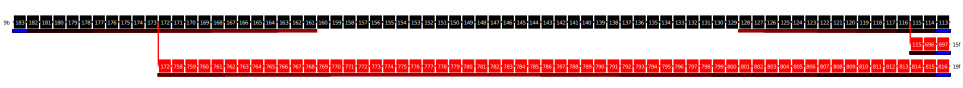

In [12]:
view = tree.renderer
view.zoom = 1.1
view.scale_y = 20
view.scale_x = 12
view.font_size = 0.24
SVG(view.to_svg())